In [1]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.1'

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from algorithms.utils import restore_state_multi_agent

In [2]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/INAIA-REC/trained_agents/20250616_081345'

networks_batteries, network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent(directory)

In [3]:
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams.update({'font.size': 16})
cmap = mpl.colormaps['plasma']
n_agents = config['NUM_BATTERY_AGENTS']
colors = cmap(np.linspace(0, 1, n_agents))

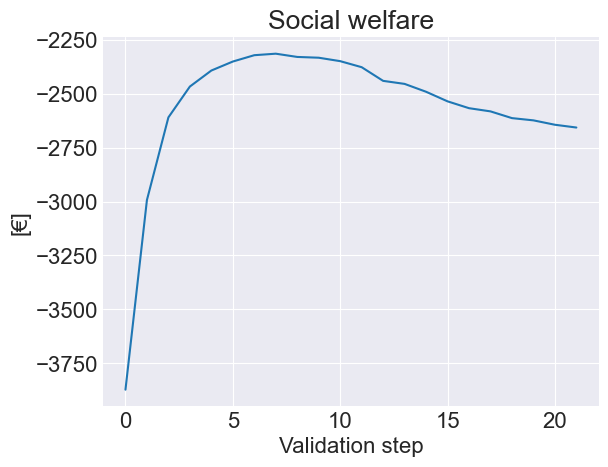

In [4]:
welfare = val_info['r_tot'][..., :config['NUM_RL_AGENTS']].sum(axis=(1, 2))
plt.plot(welfare)
plt.xlabel('Validation step')
plt.ylabel('[€]')
_ = plt.title('Social welfare')

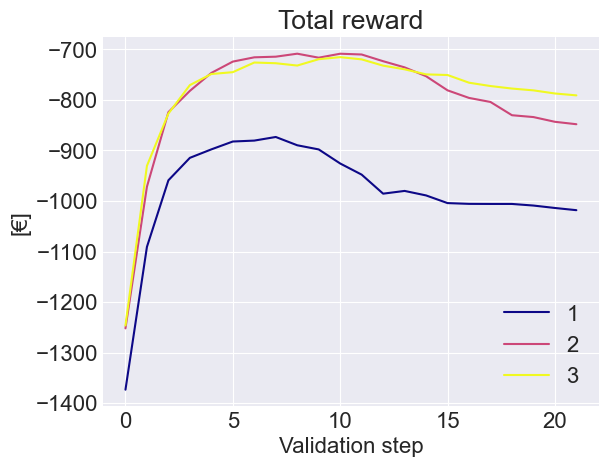

In [5]:
for i in range(n_agents):
    plt.plot(val_info['r_tot'].sum(axis=1)[:, i], color=colors[i], label=f'{i+1}')
plt.title('Total reward')
plt.xlabel('Validation step')
plt.ylabel('[€]')
_ = plt.legend()

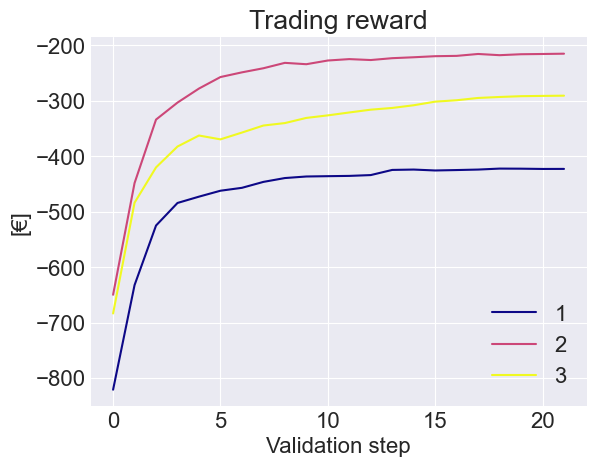

In [6]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_trad'].sum(axis=1)[:, i], color=colors[i], label=f'{i+1}')
plt.title('Trading reward')
plt.xlabel('Validation step')
plt.ylabel('[€]')
_ = plt.legend()

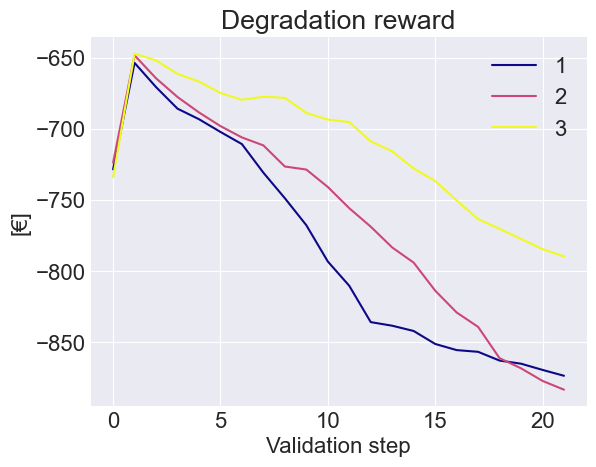

In [7]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_deg'].sum(axis=1)[:, i], color=colors[i], label=f'{i+1}')
plt.title('Degradation reward')
plt.xlabel('Validation step')
plt.ylabel('[€]')
_ = plt.legend()

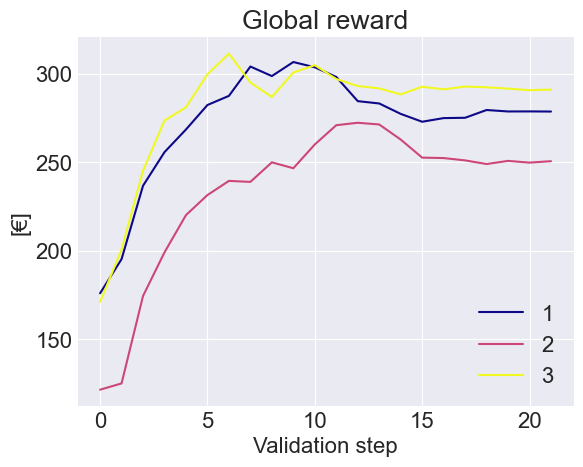

In [8]:
for i in range(n_agents):
    plt.plot(val_info['weig_reward']['r_glob'].sum(axis=1)[:, i], color=colors[i], label=f'{i+1}')
plt.title('Global reward')
plt.xlabel('Validation step')
plt.ylabel('[€]')
_ = plt.legend()

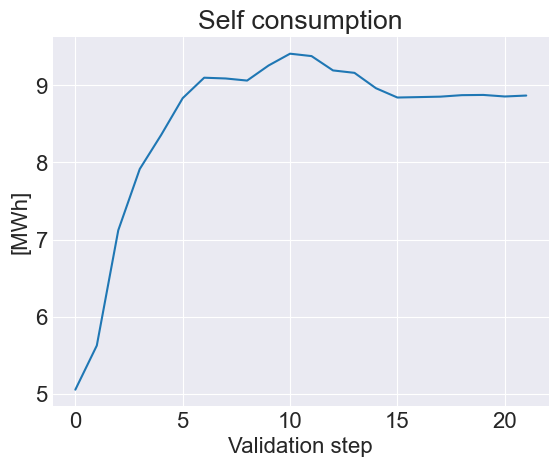

In [9]:
plt.plot(val_info['self_consumption'].sum(axis=1)/1000000)
plt.xlabel('Validation step')
plt.ylabel('[MWh]')
_ = plt.title('Self consumption')